# Opening a New Hotel in New York City, United State

## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

## Table of contends
* [Introduction](#introduction )
* [About Data](#data)
* [Business Problem](#businessProblem)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

## Introduction <a name="introduction"></a>

For many tourists, traveling is a good way to relax. They can go shopping in local malls, admire cultural relics in museums, and enjoy local cuisine. The real estate industry also uses this trend to build more hotels in the city to cater to the needs of travelers. As a result, a large number of hotels were built in Manhattan. Of course, there are many commercial factors to consider when building a hotel. One of the most important factors is geographic location.

## Bussiness Problem <a name="bussinessProblem"></a> 
The objective of this capstone project is to analyze and select the best locations in Manhattan to open a new hotel mainly for travelers. The project aims to provide solutions to answer the business question: In New York City if a property developer wants to open a new hotel which mainly provides services to travelers, where would you recommend that they open it?
### Interested Audience
I think that property developers and tourists are interesting audiences. On the one hand, the property developers can get more profits from where to build hotels. On the other hand, tourists can also know where to live when they visit Manhattan.



## About Data <a name="data"></a> 

### To solve the problem, we will need the following data:
- List of Boroughs and neighborhoods of Manhattan with their geodata (latitude and longitude)
- List of Subway metro stations in Manhattan with their address location 
- Venues data, particularly data related to travelers, for each Manhattan neighborhood (that can be clustered)

### Data source:
- https://geo.nyu.edu/catalog/nyu_2451_34572
- Foursquare API

### How data will be used to solve the problem
1. The link above contains a list of neighborhoods in Manhattan, with a total of 5 boroughs and 306 neighborhoods. We will download it from that link. 
2. After that, we will use Foursquare API to get the venue data for those boroughs and neighborhoods.
3. We need to select our interested information from those data, because the API will provide a lot of categories of data. 
4. Then, data cleaning, data wrangling will be done by using multiple machine learning skills in this process.
5. Lastly, we will use K-means clustering and data visualization skills to show the result. 

## Methodology <a name="methodology"></a>
Firstly, we need to get the list of neighbourhoods in Manhattan. In this project, we use the data from this link (https://geo.nyu.edu/catalog/nyu_2451_34572).

## Analysis <a name="analysis"></a>


### Import packages

In [1]:
import numpy as np 
import pandas as pd 
import folium
from sklearn.cluster import KMeans
import requests # library to handle requests
from pandas.io.json import json_normalize
#!conda install -c conda-forge geopy --yes  
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
import os
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

### Get Data from the link

In [2]:

newyork_data = requests.get("https://cocl.us/new_york_dataset")

In [3]:
newyork_data = newyork_data.json()

In [4]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Create a map of Manhattan with those neighborhoods

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head() 


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [8]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [9]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Use the forsquare API to explore the neighborhoods

In [1]:
CLIENT_ID = "Id" # your Foursquare ID
CLIENT_SECRET = "S" # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Id
CLIENT_SECRET:S


#### Find venues that are within a radius of 2000 meters

In [11]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [12]:
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 1000 # 1000 meters
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [13]:
results = requests.get(url).json()
results

primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b6b4bf7f964a520f1fe2be3-63'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dffff6952b10e7477997ee5',
       'name': 'Stairing Is Caring',
       'location': {'address': '215th and Broadway',
        'lat': 40.86977743640557,
        'lng': -73.9166900555486,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.86977743640557,
          'lng': -73.9166900555486}],
        'distance': 908,
        'postalCode': '10034',
        'cc': 'US',
        'city': 'New York',
        'state': 'NY',
        'country': 'United States',
        'formattedAddress': ['215th and Broadway',
         'New York, NY 10034',
         'United States']},
       'categories': [{'id': '4bf58dd8d48988d159941735',
         'name': 'Trail',
         'pluralName': 'Trails

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bikram Yoga,Yoga Studio,40.876844,-73.906204
1,Arturo's,Pizza Place,40.874412,-73.910271
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Sam's Pizza,Pizza Place,40.879435,-73.905859
4,Starbucks,Coffee Shop,40.877531,-73.905582


### Explore neighborhoods

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [132]:
# manhattan_venues[manhattan_venues["Venue Category"].str.contains("Hotel")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
28,Chinatown,40.715618,-73.994279,Hotel 50 Bowery NYC,40.715936,-73.996789,Hotel
78,Chinatown,40.715618,-73.994279,The Leon Hotel,40.715994,-73.995171,Hotel
466,Upper East Side,40.775639,-73.960508,The Carlyle,40.774413,-73.963301,Hotel
467,Upper East Side,40.775639,-73.960508,Bemelmans Bar,40.774607,-73.963308,Hotel Bar
493,Upper East Side,40.775639,-73.960508,The Surrey,40.774415,-73.963889,Hotel
...,...,...,...,...,...,...,...
3000,Flatiron,40.739673,-73.990947,The New York EDITION,40.741286,-73.987358,Hotel
3058,Hudson Yards,40.756658,-74.000111,Equinox Hotel - Hudson Yards,40.754768,-74.001986,Hotel
3064,Hudson Yards,40.756658,-74.000111,Four Points by Sheraton Manhattan Midtown West,40.754998,-73.998427,Hotel
3086,Hudson Yards,40.756658,-74.000111,YOTEL New York,40.759171,-73.995268,Hotel


#### Check out how many venue categories in the returned venues

In [18]:
manhattan_venues_category = manhattan_venues[["Venue Category"]]

In [19]:
manhattan_venues_category

,Venue Category
0,Pizza Place
1,Yoga Studio
2,Diner
3,Coffee Shop
4,Donut Shop
...,...
3099,BBQ Joint
3100,Stables
3101,Café
3102,Boat or Ferry


In [20]:
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Restaurant") ] = "Restarant"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Diner") ] = "Restarant"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Pizza") ] = "Restarant"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Store") ] = "Store"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Shop") ] = "Shop"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Bar") ] = "Bar"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Theater") ] ="Theater"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Museum") ] ="Museum"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Studio") ] ="Studio"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("School") ] ="School"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Hostel") ] ="Hotel"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Park") ] = "Park"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Site") ] = "Site"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Station") ] = "Station"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Art") ] = "Art"
manhattan_venues_category[manhattan_venues_category["Venue Category"].str.contains("Stadium") ] = "Stadium"

# manhattan_venues_category.drop_duplicates(inplace=True)
manhattan_venues_category

,Venue Category
0,Restarant
1,Studio
2,Restarant
3,Shop
4,Shop
...,...
3099,BBQ Joint
3100,Stables
3101,Café
3102,Boat or Ferry


In [21]:

manhattan_venues_category.drop_duplicates().tail(110)

,Venue Category
214,Farmers Market
220,Bistro
229,Veterinarian
247,Dog Run
249,Playground
...,...
2907,Heliport
2935,Baseball Field
2941,Pet Service
3008,Tech Startup


#### Merge similar categories into one category

In [22]:
 manhattan_venues[["Venue Category"]] = manhattan_venues_category

### Analyze Each Neighborhood

In [23]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,66,66,66,66,66,66
Carnegie Hill,83,83,83,83,83,83
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,97,97,97,97,97,97
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


In [24]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Adult Boutique,Arcade,Art,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,Bar,...,Tennis Court,Theater,Tourist Information Center,Track,Trail,Used Bookstore,Veterinarian,Volleyball Court,Waterfront,Wings Joint
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Adult Boutique,Arcade,Art,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,Bar,...,Tennis Court,Theater,Tourist Information Center,Track,Trail,Used Bookstore,Veterinarian,Volleyball Court,Waterfront,Wings Joint
0,Battery Park City,0.00,0.000000,0.000000,0.015152,0.015152,0.015152,0.000000,0.000000,0.015152,...,0.000000,0.015152,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Carnegie Hill,0.00,0.000000,0.012048,0.000000,0.000000,0.000000,0.024096,0.000000,0.072289,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Central Harlem,0.00,0.000000,0.045455,0.000000,0.000000,0.022727,0.000000,0.000000,0.113636,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.00,0.000000,0.090000,0.000000,0.000000,0.000000,0.030000,0.000000,0.050000,...,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Chinatown,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.100000,...,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Civic Center,0.00,0.000000,0.010309,0.000000,0.000000,0.000000,0.020619,0.000000,0.092784,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309
6,Clinton,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.010000,0.000000,0.080000,...,0.000000,0.100000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,East Harlem,0.00,0.000000,0.024390,0.000000,0.000000,0.000000,0.097561,0.000000,0.048780,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000,0.000000,0.200000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Financial District,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Let's add up the number of places that tourists might go

In [87]:
play = manhattan_grouped[["Art","Theater","Museum","Park","Site","Bar","Stadium"]].sum(axis=1)

In [88]:
play

0     0.212121
1     0.108434
2     0.181818
3     0.200000
4     0.130000
5     0.144330
6     0.220000
7     0.121951
8     0.220000
9     0.140000
10    0.090000
11    0.151163
12    0.120000
13    0.152542
14    0.160714
15    0.122807
16    0.080000
17    0.168421
18    0.060000
19    0.183673
20    0.073171
21    0.088889
22    0.038462
23    0.110000
24    0.112245
25    0.097561
26    0.077922
27    0.090000
28    0.068966
29    0.102273
30    0.285714
31    0.100000
32    0.207792
33    0.108108
34    0.150000
35    0.100000
36    0.166667
37    0.057471
38    0.200000
39    0.090000
dtype: float64

In [89]:
manhattan_grouped = manhattan_grouped[["Neighborhood","Restarant", "Hotel"]]
manhattan_grouped["Sites"] = play

In [90]:
manhattan_grouped

,Neighborhood,Restarant,Hotel,Sites
0,Battery Park City,0.075758,0.060606,0.212121
1,Carnegie Hill,0.277108,0.012048,0.108434
2,Central Harlem,0.363636,0.000000,0.181818
3,Chelsea,0.190000,0.010000,0.200000
4,Chinatown,0.380000,0.020000,0.130000
5,Civic Center,0.237113,0.051546,0.144330
6,Clinton,0.220000,0.030000,0.220000
7,East Harlem,0.365854,0.000000,0.121951
8,East Village,0.410000,0.000000,0.220000
9,Financial District,0.280000,0.040000,0.140000


In [91]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
       venue  freq
0      Sites  0.21
1  Restarant  0.08
2      Hotel  0.06


----Carnegie Hill----
       venue  freq
0  Restarant  0.28
1      Sites  0.11
2      Hotel  0.01


----Central Harlem----
       venue  freq
0  Restarant  0.36
1      Sites  0.18
2      Hotel  0.00


----Chelsea----
       venue  freq
0      Sites  0.20
1  Restarant  0.19
2      Hotel  0.01


----Chinatown----
       venue  freq
0  Restarant  0.38
1      Sites  0.13
2      Hotel  0.02


----Civic Center----
       venue  freq
0  Restarant  0.24
1      Sites  0.14
2      Hotel  0.05


----Clinton----
       venue  freq
0  Restarant  0.22
1      Sites  0.22
2      Hotel  0.03


----East Harlem----
       venue  freq
0  Restarant  0.37
1      Sites  0.12
2      Hotel  0.00


----East Village----
       venue  freq
0  Restarant  0.41
1      Sites  0.22
2      Hotel  0.00


----Financial District----
       venue  freq
0  Restarant  0.28
1      Sites  0.14
2      Hotel  0.04


----Flatir

In [94]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

#### Select the number of cluster centers based on the elbow point

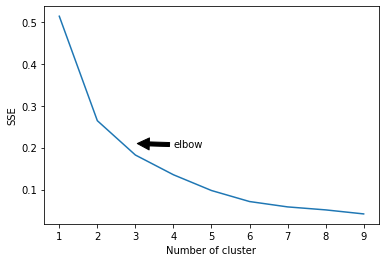

In [95]:
SSE = {}
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(manhattan_grouped_clustering)
    SSE[i] = kmeans.inertia_

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(list(SSE.keys()), list(SSE.values()))
ax.annotate("elbow", xy=(3,0.21), xytext=(4,0.2), arrowprops=dict(facecolor="black",shrink=0.05))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [96]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [97]:

manhattan_merged = manhattan_grouped

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged["Cluster Labels"] = kmeans.labels_
manhattan_merged = manhattan_merged.join(manhattan_data.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head() 

,Neighborhood,Restarant,Hotel,Sites,Cluster Labels,Borough,Latitude,Longitude
0,Battery Park City,0.075758,0.060606,0.212121,2,Manhattan,40.711932,-74.016869
1,Carnegie Hill,0.277108,0.012048,0.108434,0,Manhattan,40.782683,-73.953256
2,Central Harlem,0.363636,0.000000,0.181818,1,Manhattan,40.815976,-73.943211
3,Chelsea,0.190000,0.010000,0.200000,0,Manhattan,40.744035,-74.003116
4,Chinatown,0.380000,0.020000,0.130000,1,Manhattan,40.715618,-73.994279


In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

map_clusters

In [104]:
manhattan_merged

,Neighborhood,Restarant,Hotel,Sites,Cluster Labels,Borough,Latitude,Longitude
0,Battery Park City,0.075758,0.060606,0.212121,2,Manhattan,40.711932,-74.016869
1,Carnegie Hill,0.277108,0.012048,0.108434,0,Manhattan,40.782683,-73.953256
2,Central Harlem,0.363636,0.000000,0.181818,1,Manhattan,40.815976,-73.943211
3,Chelsea,0.190000,0.010000,0.200000,0,Manhattan,40.744035,-74.003116
4,Chinatown,0.380000,0.020000,0.130000,1,Manhattan,40.715618,-73.994279
5,Civic Center,0.237113,0.051546,0.144330,0,Manhattan,40.715229,-74.005415
6,Clinton,0.220000,0.030000,0.220000,0,Manhattan,40.759101,-73.996119
7,East Harlem,0.365854,0.000000,0.121951,1,Manhattan,40.792249,-73.944182
8,East Village,0.410000,0.000000,0.220000,1,Manhattan,40.727847,-73.982226
9,Financial District,0.280000,0.040000,0.140000,0,Manhattan,40.707107,-74.010665


In [106]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[list(range(0, manhattan_merged.shape[1]))]]

,Neighborhood,Restarant,Hotel,Sites,Cluster Labels,Borough,Latitude,Longitude
1,Carnegie Hill,0.277108,0.012048,0.108434,0,Manhattan,40.782683,-73.953256
3,Chelsea,0.190000,0.010000,0.200000,0,Manhattan,40.744035,-74.003116
5,Civic Center,0.237113,0.051546,0.144330,0,Manhattan,40.715229,-74.005415
6,Clinton,0.220000,0.030000,0.220000,0,Manhattan,40.759101,-73.996119
9,Financial District,0.280000,0.040000,0.140000,0,Manhattan,40.707107,-74.010665
10,Flatiron,0.240000,0.010000,0.090000,0,Manhattan,40.739673,-73.990947
11,Gramercy,0.267442,0.023256,0.151163,0,Manhattan,40.737210,-73.981376
14,Hudson Yards,0.214286,0.053571,0.160714,0,Manhattan,40.756658,-74.000111
17,Lincoln Square,0.189474,0.010526,0.168421,0,Manhattan,40.773529,-73.985338
22,Marble Hill,0.153846,0.000000,0.038462,0,Manhattan,40.876551,-73.910660


In [108]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[list(range(0, manhattan_merged.shape[1]))]]

,Neighborhood,Restarant,Hotel,Sites,Cluster Labels,Borough,Latitude,Longitude
2,Central Harlem,0.363636,0.000000,0.181818,1,Manhattan,40.815976,-73.943211
4,Chinatown,0.380000,0.020000,0.130000,1,Manhattan,40.715618,-73.994279
7,East Harlem,0.365854,0.000000,0.121951,1,Manhattan,40.792249,-73.944182
8,East Village,0.410000,0.000000,0.220000,1,Manhattan,40.727847,-73.982226
12,Greenwich Village,0.400000,0.000000,0.120000,1,Manhattan,40.726933,-73.999914
13,Hamilton Heights,0.372881,0.000000,0.152542,1,Manhattan,40.823604,-73.949688
15,Inwood,0.385965,0.000000,0.122807,1,Manhattan,40.867684,-73.921210
16,Lenox Hill,0.320000,0.000000,0.080000,1,Manhattan,40.768113,-73.958860
18,Little Italy,0.330000,0.020000,0.060000,1,Manhattan,40.719324,-73.997305
19,Lower East Side,0.326531,0.000000,0.183673,1,Manhattan,40.717807,-73.980890


In [107]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[list(range(0, manhattan_merged.shape[1]))]]

,Neighborhood,Restarant,Hotel,Sites,Cluster Labels,Borough,Latitude,Longitude
0,Battery Park City,0.075758,0.060606,0.212121,2,Manhattan,40.711932,-74.016869
30,Stuyvesant Town,0.000000,0.000000,0.285714,2,Manhattan,40.731000,-73.974052


## Results and Discussion <a name="result"></a>


According to the results of clustering, we can see. First of all, the third category is definitely not our goal, because the number of restaurants and hotels is very small.
Next, let's look at the first and second categories. In the first category, we find that restaurants, hotels and tourist attractions are relatively evenly distributed, but this shows that this area has undergone some development and competition may be fierce. The second type of area also has many equity and tourist attractions, but the number of hotels is relatively small. I think it is a good location to open a new hotel.

## Conclusion <a name="conclusion"></a>

Therefore, this project recommends property developers to capitalize on these findings to open new hotel in neighborhoods in cluster 1 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new hotels in neighborhoods in cluster 0 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 2 which lack of enough catering services.

## References <a name="References"></a>
- Foursquare Developers Documentation.  https://developer.foursquare.com/docs/
